# Übung 7

## Schnittstellen/API

Mit der Pageviews API von Wikipedia können verschiedene Abrufstatistiken abgerufen werden.
Mach dich zuerst mit der [Pageviews-Dokumentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews) vertraut.
Bearbeite anschließend die Aufgabe zum Wikipedia Jahresrückblick.


Welche Wikipedia-Seiten wurden an deinem Geburtstag am häufigsten in Deutschland besucht?
Speichere die Top 10 in einer Liste.

In [7]:
# Dein Code
"""
Mit dem requests-Paket können REST-Abfragen an alle Webseiten gestellt werden. Wie in der Aufgabe "REST-Abfragen auf normalen Webseiten" deutlich wird, sind solche Abfragen aber nur auf extra dafür eingerichteten APIs sinnvoll.
Die einfachsten REST-Abfragen beinhalten nur die URL, die abgefragt werden soll.
Meistens wird aber auch eine Authentifizierung benötigt, die im sogenannten Header festgelegt sein muss.
Was genau benötigt wird und wie die URL aussieht, um einer bestimmten API eine Abfrage zu stellen, sollte vor der Verwendung in der Dokumentation der jeweiligen API recherchiert werden.
"""
import requests
url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/top-per-country/DE/all-access/2022/10/07'
headers = {'user-agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}

response = requests.get(url, headers=headers)
# Hier speichern wir aus der erhaltenen Antwort die ersten 10 Ergebnisse.
# Beachte, dass die Struktur der Antwort je nach API sehr unterschiedlich ist und damit auch der Zugriff auf die gewünschten Daten ganz anders aussehen kann.
top10 = response.json()['items'][0]['articles'][:10]
top10

[{'article': 'Wikipedia:Hauptseite',
  'project': 'de.wikipedia',
  'views_ceil': 705800,
  'rank': 1},
 {'article': 'Spezial:Suche',
  'project': 'de.wikipedia',
  'views_ceil': 136000,
  'rank': 2},
 {'article': 'Jeffrey_Dahmer',
  'project': 'de.wikipedia',
  'views_ceil': 114100,
  'rank': 3},
 {'article': 'Main_Page',
  'project': 'en.wikipedia',
  'views_ceil': 103100,
  'rank': 4},
 {'article': 'Günter_Lamprecht',
  'project': 'de.wikipedia',
  'views_ceil': 88600,
  'rank': 5},
 {'article': 'Special:MyPage/toolserverhelferleinconfig.js',
  'project': 'de.wikipedia',
  'views_ceil': 42900,
  'rank': 6},
 {'article': 'Armageddon',
  'project': 'de.wikipedia',
  'views_ceil': 28700,
  'rank': 7},
 {'article': 'Special:Search',
  'project': 'en.wikipedia',
  'views_ceil': 26300,
  'rank': 8},
 {'article': 'Elisabeth_von_Österreich-Ungarn',
  'project': 'de.wikipedia',
  'views_ceil': 24400,
  'rank': 9},
 {'article': 'Wladimir_Wladimirowitsch_Putin',
  'project': 'de.wikipedia',
  

Ermittle nun für jede Seite der Top 10 wie häufig diese zwischen dem 1. Januar und dem 30. November 2022 aufgerufen wurde.

In [16]:
# Dein Code

def format_data(input:list) -> list:
    """
    Die Hilfsfunktion format_data nimmt sich aus der Eingabeliste alle Viewzahlen
    und speichert diese in einer neuen Liste, das ist Teil des Data Cleanings und hilft uns später die gewünschten Daten einfach in einen Pandas Dataframe zu speichern.
    :param input: Eine Liste von Dictionaries, in denen jeweils die Viewzahlen zu finden sind.
    :return: Eine Liste die alle Viewzahlen enthält.
    """
    hilfsliste = []
    for entry in input:
        hilfsliste.append(entry['views'])

    return hilfsliste

"""
Um jetzt für alle Seiten der Top 10 die monatlichen Aufrufzahlen in einem bestimmten Zeitraum zu finden müssen wir eine neue GET-Abfrage stellen.
Um die URL nicht für jede Seite einzeln zu definieren, arbeiten wir mit einem f-String. So können wir die Variablen project und seite einfach an der entsprechenden Stelle einsetzen.
Wichtig ist hierbei, dass die Variablen zuvor festgelegt werden (innerhalb der for-Schleife).
"""
yearly_views = {}
for entry in top10:
    seite = entry['article']
    project = entry['project']

    url2= f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/{project}/all-access/all-agents/{seite}/monthly/2022010100/2022113000'

    response2 = requests.get(url2, headers=headers)
    #print(response2.json())
    """Es kann vorkommen, dass in der Top 10 Seiten auftauchen, die für diese Anfrage eine fehlerhafte Antwort liefern, deshalb überprüfen wir vor dem speichern in unser Dictionary, ob die Antwort den Status Code 200 hat, also OK ist."""
    if response2.status_code == 200:
        yearly_views[seite] = format_data(response2.json()['items'])

yearly_views

{'Wikipedia:Hauptseite': [44262455,
  36924036,
  43388543,
  34314471,
  36495483,
  35085703,
  36638610,
  43347061,
  45682846,
  40416186,
  41663638],
 'Spezial:Suche': [8903866,
  7663019,
  8253779,
  8019271,
  7448381,
  7140473,
  7042975,
  7102671,
  7107440,
  7598127,
  7267013],
 'Jeffrey_Dahmer': [25149,
  23631,
  19592,
  28361,
  25032,
  25538,
  20772,
  33370,
  1525563,
  3360663,
  498380],
 'Main_Page': [370821303,
  355461972,
  363534154,
  345340304,
  373874468,
  426538027,
  395058931,
  410623033,
  345382769,
  409487242,
  396711178],
 'Günter_Lamprecht': [6942,
  6365,
  8405,
  5003,
  6508,
  4905,
  6926,
  12272,
  4900,
  146141,
  6390],
 'Armageddon': [4250,
  3111,
  3937,
  2799,
  2787,
  3506,
  2389,
  2809,
  3697,
  112474,
  4651],
 'Special:Search': [51386256,
  47538973,
  61230888,
  57099022,
  52423122,
  48578060,
  50003781,
  48936945,
  51458391,
  60878555,
  49106176],
 'Elisabeth_von_Österreich-Ungarn': [310795,
  113627,
 

Speichere die Ergebnisse in einem pandas DataFrame und stelle die Aufrufzahlen der Top 10 in dem Zeitraum grafisch dar.

,Wikipedia:Hauptseite,Spezial:Suche,Jeffrey_Dahmer,Main_Page,Günter_Lamprecht,Armageddon,Special:Search,Elisabeth_von_Österreich-Ungarn,Wladimir_Wladimirowitsch_Putin
jan,44262455,8903866,25149,370821303,6942,4250,51386256,310795,159914
feb,36924036,7663019,23631,355461972,6365,3111,47538973,113627,2105921
mar,43388543,8253779,19592,363534154,8405,3937,61230888,53185,1576213
apr,34314471,8019271,28361,345340304,5003,2799,57099022,139013,313807
mai,36495483,7448381,25032,373874468,6508,2787,52423122,74521,208446
jun,35085703,7140473,25538,426538027,4905,3506,48578060,58298,118831
jul,36638610,7042975,20772,395058931,6926,2389,50003781,78653,113471
aug,43347061,7102671,33370,410623033,12272,2809,48936945,72093,116797
sep,45682846,7107440,1525563,345382769,4900,3697,51458391,172067,245639
okt,40416186,7598127,3360663,409487242,146141,112474,60878555,817391,253360


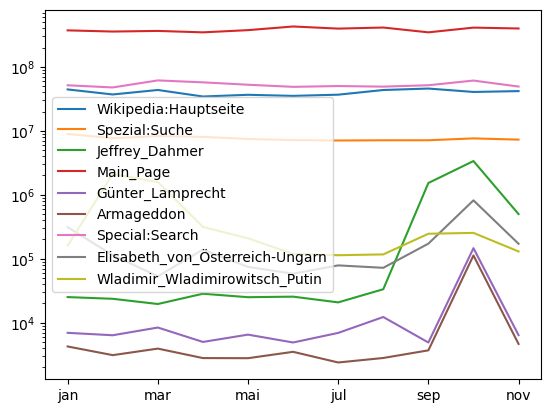

In [20]:
# Dein Code
"""
Jetzt können wir unsere Ergebnisse in einen Pandas Dataframe übertragen und anschließend darstellen.
Ich habe mich hier für eine logarithmische Darstellung der Y-Achse entschieden, da sonst die sehr häufig aber relativ konstanten besuchten Haupt- und Suchseiten die seltener aber wesentlich trendabhängiger besuchten Sonderseiten überschatten würden.
"""
import pandas as pd
import matplotlib
df = pd.DataFrame(yearly_views, index=['jan', 'feb', 'mar', 'apr', 'mai', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov'])
df.plot(kind='line', logy = True)
df

## REST-Abfragen auf normalen Webseiten

Stelle eine get-request an deine Liebelingswebseite und gib den Status Code der Antwort aus.

In [1]:
# Dein Code
"""
Wie oben bereits erwähnt, lassen sich REST-Abfragen an jede gültige Webseite stellen. Wie zu sehen ist, ist auch der Status Code in Ordnung.
Im Grunde funktionieren auch Webbrowser so, dass sie GET-Anfragen an die jeweiligen Seiten stellen und als Antwort einen HTML-Text erhalten, der dann dargestellt wird.
"""
import requests
url = "https://www.portalnovosti.com/ko-kain-klan"

response = requests.get(url)

response.status_code

200

Gib nun den Inhalt der Antwort aus.

In [3]:
# Dein Code
"""
Wie sich hier aber zeigt, sind HTML-Responses zur Datenakquirierung wenig geeignet, da sich Daten nur sehr aufwändig aus HTML holen lassen.
"""
response.content


b'<!DOCTYPE html>\n<html>\n<head>\n<meta charset=\'UTF-8\'>\n<meta content=\'width=device-width, initial-scale=1.0, maximum-scale=1.0\' name=\'viewport\'>\n<title>Ko Kain Klan - Portal Novosti</title>\n<meta content=\'Ko Kain Klan\' property=\'og:title\'>\n<meta content=\'Gotovo dvadeset pet godina, sve dok sofisticirana kompjuterska tehnika, u ono vrijeme rezervirana samo za FBI i scenariste ameri\xc4\x8dkih trilera, nije uznapredovala do to\xc4\x8dke da je \xc4\x8dak i ja umijem koristiti, nitko nije imao pojma \xc5\xa1to se nalazi na posteru iz djevoja\xc4\x8dke sobe Velimira Bujanca\' name=\'Description\'>\n<meta content=\'novosti,portal,snv,srbi,hrvatska\' name=\'Keywords\'>\n<meta content=\'https://www.portalnovosti.com/img/media/image/k1d7x9r6gtlkc2x6us2vkue85l0.jpg\' property=\'og:image\'>\n<meta content=\'Gotovo dvadeset pet godina, sve dok sofisticirana kompjuterska tehnika, u ono vrijeme rezervirana samo za FBI i scenariste ameri\xc4\x8dkih trilera, nije uznapredovala do to\

Versuche den eben ausgeben Inhalt im JSON-Format auszugeben.

In [2]:
# Dein Code
"""
Eine Response die HTML beinhaltet, kann logischerweise nicht als JSON dargestellt werden.
"""
response.json()


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
"""
Um zu überprüfen, um welches Format es sich in der Response handelt, lohnt ein Blick in den Header. Hier muss nach dem Eintrag 'Content-Type' gesucht werden.
"""
response.headers
response.headers['Content-Type']

{'Date': 'Thu, 15 Dec 2022 12:35:18 GMT', 'Server': 'Apache', 'Cache-Control': 'max-age=0, private, must-revalidate', 'X-XSS-Protection': '1; mode=block', 'X-Request-Id': 'cf940112-83d1-4f04-ade5-cdcd3a053c5c', 'X-Frame-Options': 'SAMEORIGIN, sameorigin', 'X-Runtime': '0.179812', 'X-Content-Type-Options': 'nosniff', 'X-Powered-By': 'Phusion Passenger 5.0.30', 'Set-Cookie': '_portal_novosti_session=OStkYlJ3aGp1VjhSRlc0b2dBYi9OUTNDY3cwMk1UeURiY09iVkluVG1rRzRaeVpMVUdia0hmNGk4YWhNUDFvejJiSi9wZjRrQUM2TUltZ0tLOC9Kczl2Z1diSWZPd0NXWmFGc1YxQlBRZmFiZ3RMWThxVjR2N0hvaG9UcGpqaXVmenE0SEFTRjdGSmJ2ZW5GczUrRjBnPT0tLUpmQzVhVmVaSDVWWk8xM242N2YyN0E9PQ%3D%3D--bc5d527a6af1ff205e9e82c8e163a52ba0dcb8cb; path=/; HttpOnly', 'ETag': 'W/"8d6ebb411d3d0bf0452f544ed19965f1-gzip"', 'Status': '200 OK', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Content-Length': '4904', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=utf-8'}